In [1]:
import pandas as pd 
import numpy as np 
import random
import math
from datetime import datetime

from sklearn.model_selection import train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics 

import matplotlib.pyplot as plt

In [94]:
#df = pd.read_csv('C:\\Users\\Dell\\Documents\\Python\\KPDL\\Bài báo cáo\\Data_Mining_Github\\Data\\wine.csv')
#df = pd.read_csv('C:\\Users\\Dell\\Documents\\Python\\KPDL\\Bài báo cáo\\Data_Mining_Github\\Data\\Brain.csv')
df = pd.read_csv('C:\\Users\\Dell\\Documents\\Python\\KPDL\\Bài báo cáo\\Data_Mining_Github\\Data\\Prostate.csv')
df.head()

,class,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V6025,V6026,V6027,V6028,V6029,V6030,V6031,V6032,V6033,V6034
0,0,-0.927178,-0.740039,-0.532016,-1.097891,-0.986673,0.018752,-0.863326,3.959997,-0.398219,...,-0.029602,-1.097891,-1.097891,-0.894733,0.850270,-1.097891,-0.302063,-0.767685,-0.452616,0.194001
1,0,-0.835899,-0.835899,-0.585647,-0.835899,-0.329768,-0.835899,-0.835899,4.037788,-0.835899,...,-0.835899,-0.835899,-0.835899,-0.835899,0.038090,-0.835899,-0.835899,-0.835899,-0.835899,0.075500
2,0,0.236073,0.252645,-1.154351,-0.372372,-0.338900,1.253467,0.506325,3.868961,0.201932,...,0.860446,-1.154351,-1.154351,-0.372372,0.899781,-0.867200,0.360426,-1.154351,-1.154351,-1.154351
3,0,-0.748623,-0.439165,0.790953,-1.033876,0.241115,1.216007,0.106282,3.976272,0.081755,...,0.614026,-1.121534,-1.121534,-0.812076,1.230378,-0.355497,0.030647,-0.278810,-1.121534,-1.121534
4,0,0.101239,-0.298285,-1.121519,-0.957714,0.342258,1.182937,0.029325,4.575871,-0.196466,...,0.639511,-1.121519,-1.121519,-0.454932,0.891627,-0.593427,0.306316,-0.076496,-0.134480,-1.121519


In [95]:
df['class'].unique()

array([0, 1], dtype=int64)

In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Columns: 6034 entries, class to V6034
dtypes: float64(6033), int64(1)
memory usage: 4.7 MB


In [97]:
#select input and output data for model
X = df.iloc[:,df.columns !='class']
r, c = df.shape
y = df[['class']]

# accuracy_score list
acc_DT =list()
acc_RF= list()
acc_Bagging = list()

# time 
time_DT =list()
time_Bagging =list()
time_RF =list()

In [98]:
for i in range (100):
    Train_x, Test_x, Train_y, Test_y = train_test_split(X,  y, 
                                                        stratify=y, 
                                                        test_size=0.4, 
                                                        #random_state = 42)
                                                        random_state = random.randint(0,100000))
    # Decision Tree Algorithm
    start = datetime.now()
    model = DecisionTreeClassifier()
    model.fit(Train_x, Train_y)        
    y_pred = model.predict(Test_x)
    end = datetime.now() - start
    
    time_DT.append(end)
    acc = metrics.accuracy_score(Test_y, y_pred)
    acc_DT.append(acc)
    
    # Random Forest Classifier Algorithm
    start = datetime.now()
    rf_model = RandomForestClassifier(n_estimators=100, max_features= int(math.sqrt(c))+1)
    rf_model.fit(Train_x,Train_y.values.ravel())
    y_pred = rf_model.predict(Test_x)
    end = datetime.now() - start
    
    time_RF.append(end)    
    acc_RF.append(metrics.accuracy_score(Test_y, y_pred))
    
    # Bagging Algorithm
    start = datetime.now()        
    base_cls = DecisionTreeClassifier()                
    model_bagging = BaggingClassifier(estimator = base_cls, n_estimators = 100)        
    model_bagging.fit(Train_x, Train_y.values.ravel())
    y_pred = model_bagging.predict(Test_x)     
    end = datetime.now() - start
    
    time_Bagging.append(end)               
    acc = metrics.accuracy_score(Test_y, y_pred)    
    acc_Bagging.append(acc)  

In [99]:
# Decision Tree
print("Decision Tree")
print("  Độ chính xác trung bình: {:.2f}".format(np.mean(acc_DT)))
print("  Độ lệch chuẩn: {:.2f}".format(np.std(acc_DT)))

# Random Forest
print("Random Forest")
print("  Độ chính xác trung bình: {:.2f}".format(np.mean(acc_RF)))
print("  Độ lệch chuẩn: {:.2f}".format(np.std(acc_RF)))

# Bagging
print("Bagging")
print("  Độ chính xác trung bình: {:.2f}".format(np.mean(acc_Bagging)))
print("  Độ lệch chuẩn: {:.2f}".format(np.std(acc_Bagging)))

# Time
print("Time")
print("  Decision Tree: ", np.mean(time_DT))
print("  Random Forest: ", np.mean(time_RF))
print("  Bagging: ", np.mean(time_Bagging))

Decision Tree
  Độ chính xác trung bình: 0.83
  Độ lệch chuẩn: 0.06
Random Forest
  Độ chính xác trung bình: 0.87
  Độ lệch chuẩn: 0.05
Bagging
  Độ chính xác trung bình: 0.91
  Độ lệch chuẩn: 0.04
Time
  Decision Tree:  0:00:00.158047
  Random Forest:  0:00:00.374866
  Bagging:  0:00:07.400494


Text(0, 0.5, 'Accuracy')

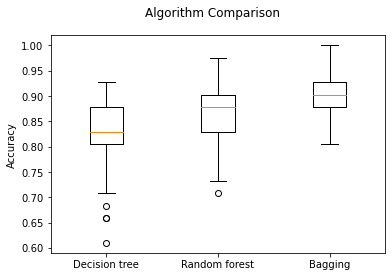

In [100]:
results =[]
results.append(acc_DT)
results.append(acc_RF)
results.append(acc_Bagging)

names =('Decision tree', 'Random forest', 'Bagging')
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
plt.boxplot(results, labels=names)
plt.ylabel('Accuracy') 

1.0